# Tutoriel sur les fonctions d'affichage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# pour avoir toutes les options d'affichage
# %matplotlib notebook
# OU pour un affichage léger et rapide
%matplotlib inline

## Affichage d'une liste de coordonnées
Soit x et y deux vecteurs de même taille

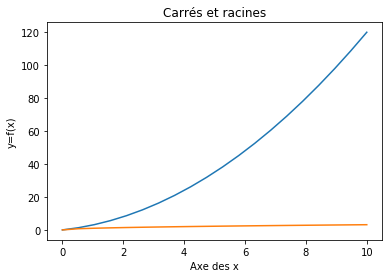

In [2]:
x = np.linspace(0,10,20)   # 20 points entre 0 et 10
y1 = x*x + 2*x             # la fonction a tracer
y2 = np.sqrt(x)            # la fonction a tracer

plt.figure()               # creation d'une figure
plt.plot(x,y1)
plt.plot(x,y2)
# y2 n'est pas au niveau 0, elle est juste écrasée par y1 en terme d'échelle !

# Ajout d'information
plt.title('Carrés et racines')
plt.xlabel('Axe des x')
plt.ylabel('y=f(x)')

plt.show()                 # parfois nécessaire en fonction des options déclarées à l'import


Ajout de légende, de sous fenêtres d'affichage...

Le style contient la forme du tracé ainsi que la couleur sous la forme d'un code lettre (r=red, b=blue, ...)

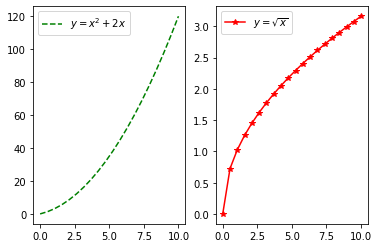

In [3]:
plt.figure()               # creation d'une figure
plt.subplot(1,2,1)         # division de la fenetre en une matrice 1x2
plt.plot(x,y1,'g--', label='$y = x^2+2x$') # $ pour du code mathématique latex
                          # affichage de la courbe + style + etiquette
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(x,y2, 'r*-', label='$y = \sqrt{x}$')
plt.legend(loc=2)          # affichage de la légende en haut a gauche
plt.show()                 # affichage de la fenetre

## Affichage d'un nuage de points

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


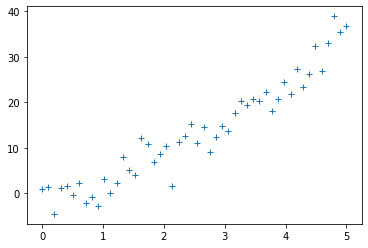

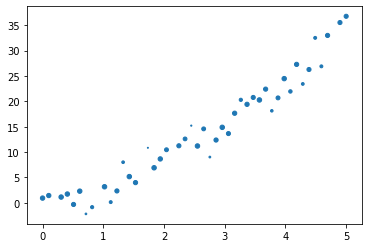

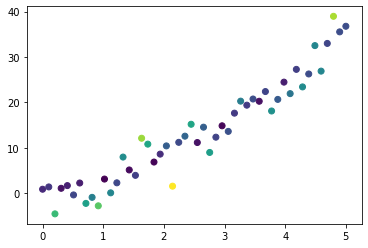

In [4]:
# commande basique = plot + options
x = np.linspace(0,5,50)
y = x*x + 2*x
yb = y + np.random.randn(x.shape[0]) *3            # la fonction a tracer

plt.figure()               # creation d'une figure
plt.plot(x,yb, '+')        # simple ajout d'une fonction de style

# fonction dédiée = scatter

plt.figure()               # creation d'une figure
plt.scatter(x,yb, 20 - (y-yb)**2) # jouer avec le rayon des points du nuage

plt.figure()               # creation d'une figure
plt.scatter(x,yb, c = np.abs(y-yb )) # jouer avec les couleurs des points du nuage

## Affichage d'une matrice

Dans le cadre du travail avec les librairies numpy et cie, nous manipulons des matrices pas évidentes à explorer. La meilleure solution est souvent de les afficher sous forme d'image.

C'est un outil que l'on utilise beaucoup, il faut être à l'aise avec. Pour ajouter des informations, on recours à la modification des axes (2ème exemple).

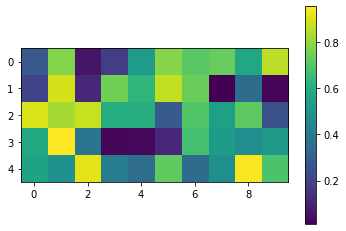

In [5]:
C = np.random.rand(5,10)     # grosse matrice
plt.figure()
plt.imshow(C, interpolation='nearest')                # affichage sour forme d'image
                             # les couleurs correspondent aux valeurs
plt.colorbar()               # legende 
plt.show()

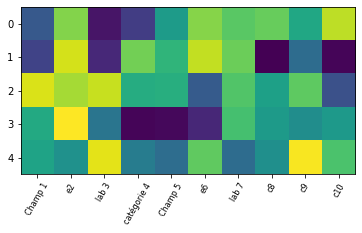

In [6]:
# affichage avancé avec modification des axes

fig, ax = plt.subplots(1,1)                  # pour avoir un pointeur vers les axes
ax.imshow(C, interpolation='nearest')        # meme matrice que ci-dessus
ax.set_xticks(np.arange(C.shape[1]))       # un texte pour chaque colonne
txts = ['Champ 1', 'e2', 'lab 3', 'catégorie 4', 'Champ 5', 'e6', 'lab 7', 'c8', 'c9', 'c10']
ax.set_xticklabels(txts,rotation=60,fontsize=8)
plt.show()

## Calcul d'histogramme (et affichage)

Les histogrammes constituent un outil de base pour l'analyse de données, il ne faut pas se contenter des options de base. Vous devez impérativement jouer avec.
- Faire varier le nombre de *bins*, voire définir vous-même les intervalles d'analyse
- Bien distinguer l'histogramme de comptage et l'estimation de la distribution de probabilité (sommant à 1)

(array([  2.,   9.,  53., 145., 239., 286., 166.,  72.,  26.,   2.]),
 array([-3.54778606, -2.85500451, -2.16222295, -1.4694414 , -0.77665985,
        -0.0838783 ,  0.60890326,  1.30168481,  1.99446636,  2.68724791,
         3.38002947]),
 <a list of 10 Patch objects>)

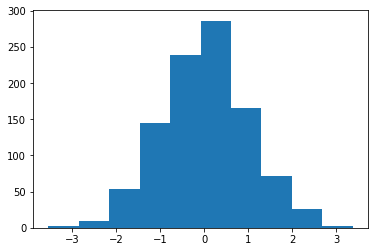

In [7]:
a = np.random.randn(1000)
plt.figure()
plt.hist(a)                     # 10 catégories par défaut

## Sauvegarde des figures

La sauvegarde des figures est essentielle pour:
- la création de rapport
- l'analyse détaillée de certaines zones qui nécessitent de zoomer plus efficacement que dans une interface jupyter

Dans tous les cas, privilégiez un format de sauvegarde vectoriel qui permet donc des zooms à l'infini et une qualité meilleure dans les rapports

In [8]:
plt.savefig('monfichier.pdf') # sauvegarde de l'image courant (c'est pour ça qu'il n'y a pas d'argument spécifique!)

<Figure size 432x288 with 0 Axes>

## Sélection des points à afficher

Combinaison d'usage entre les fonctions de recherche et les fonctions d'affichage

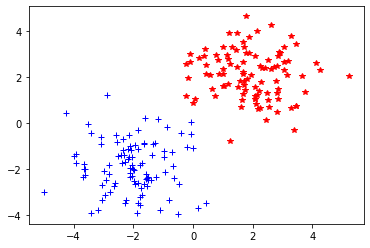

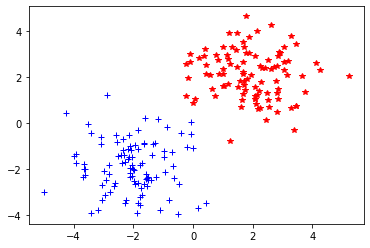

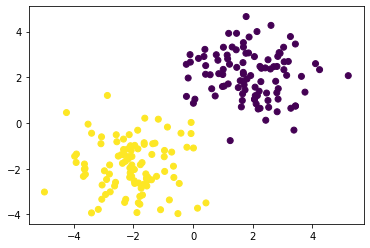

In [9]:
# génération des points de la classe 1 & 2
N=100
x = np.vstack((np.random.randn(N,2)+2,np.random.randn(N,2)-2)) # données 2D
y = np.ones(2*N) # étiquettes
y[:N] = -1

# comment afficher chaque classe d'une couleur???

# solution 1
ind1 = np.where(y==1) 
ind2 = np.where(y==-1)
plt.figure()
plt.plot(x[ind1, 0],x[ind1, 1], 'b+') # aff en croix bleues
plt.plot(x[ind2, 0],x[ind2, 1], 'r*') # aff en étoiles rouges
plt.show()

# solution 2: version rapide
plt.figure()
plt.plot(x[y==1, 0],x[y==1, 1], 'b+') # aff en croix bleues
plt.plot(x[y==-1, 0],x[y==-1, 1], 'r*') # aff en étoiles rouges

# solution 3: version maline: le code couleur peut etre un chiffre dans scatter!
plt.figure()
plt.scatter(x[:,0], x[:,1], c=y)

# Exercice d'application

## Affichage sur des données INSEE sur le salaire en fonction du diplôme et du sexe

Données brutes disponibles : http://www.insee.fr/
Données mises en forme: http://mapsi.lip6.fr/uploads/Main/salaire2010INSEE.csv

**Correspondances des lignes:**
 - Aucun ou Certificat d’études primaires
 - Brevet des collèges
 - CAP ou BEP
 - Baccalauréat
 - IUT, BTS, diplôme de 1er cycle universitaire (DEUG, L1, L2) ou diplôme équivalent
 - Diplôme supérieur à Baccalauréat +2
 - Diplôme de 2ème ou 3ème cycle universitaire
 - Diplôme d'une grande école (ingénieur, commerce)
 
**Correspondances des colonnes:**
 - Moyenne des heures travaillées
 - Salaire horaire
Les 2 colonnes sont répétées 3 fois: Ensemble de la population / Femmes / Homme

Code de chargement des données:
```python
import numpy as np
data = np.loadtxt("dataSalaire.csv", delimiter=';')
```

## Questions

A l'aide de la méthode scatter, tracer les salaires moyens en fonction des diplômes pour:
 - L'ensemble de la population (en vert)
 - Les femmes (en rose -n'ayons pas peur des clichés-)
 - Les hommes (en bleu)
 
Ajouter des titres sur les axes (xlabel, ylabel)
Modifier l'axe des x pour afficher le diplôme avec le vecteur de textes suivant:
```python
diplomes = ["Aucun", "BEPC", "CAP/BEP", "Bac", "IUT, BTS, DEUG", ">Bac+2", "Master/Phd", "Ecole Ing/com"]
```
